# Problema de classificação de partículas exóticas (SUSY)

O dataset contém 5 milhões de amostras de simulações. A classe é indicada na primeira coluna (0 ou 1); as 8 colunas seguintes são features obtidas originalmente das simulações, e as 10 seguintes são features de alto nível, computadas a partir das anteriores.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

names = ["class", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", 
         "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel",
         "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"
        ]
data = pd.read_csv("SUSY.csv", names=names, nrows=10000)
print(data.shape)

array = data.values
X = array[:, 1:]
Y = array[:, 0]

(10000, 19)


Fonte: https://machinelearningmastery.com/an-introduction-to-feature-selection/

### Matriz de correlação

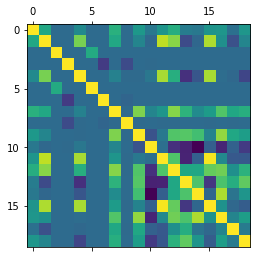

In [19]:
plt.matshow(data.corr())

## sklearn.feature_selection.SelectKBest

[Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)




In [27]:
from sklearn.feature_selection import SelectKBest, chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# summarize selected features
print(features[0:5,:])

ValueError: Input X must be non-negative.

### Recursive Feature Elimination
#### sklearn.feature_selection.RFE

...

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False False  True False False False False False
 False False  True False False False]
Feature Ranking: [ 1 16 15  6 13 14  1 12  9  8 10  3  2 11  1  7  4  5]


### Principal Component Analysis


In [28]:
# Feature Extraction with PCA
import numpy
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.21387623 0.14724111 0.12447848]
[[ 2.26460033e-01 -1.15283788e-02 -1.25404520e-03  1.16756875e-01
   1.44353846e-02  2.77363229e-03  4.44841446e-01  3.80707533e-03
   4.75274631e-01 -2.15403163e-01  1.75895844e-01  3.36484206e-01
   1.65976885e-01  3.44711211e-01  2.03284780e-01  3.50284058e-01
   8.49859173e-02  5.26202288e-02]
 [ 3.36050073e-01 -1.15689934e-03 -1.81344791e-03  3.36856998e-01
   8.48468634e-03 -1.38600741e-03  2.15798212e-01 -2.92793122e-03
  -8.81029802e-02  5.24511889e-01  3.50327628e-01  9.99205012e-02
  -2.09037440e-01 -3.89981259e-01  3.14388716e-01 -1.21561234e-01
  -2.71474911e-02 -3.48841385e-02]
 [-1.30718884e-03 -7.00213814e-01 -8.05963275e-02  4.64318046e-04
  -7.02992937e-01  6.98820708e-02  6.71838185e-03  6.32527873e-02
  -2.63043458e-03  7.28472121e-03  7.65203868e-04  5.54092215e-04
   1.72030335e-03 -5.76385677e-04  8.31226250e-04  2.83889687e-03
  -2.27798029e-04  1.15063440e-03]]


### Feature Importance

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.09599041 0.04638616 0.03429688 0.04343944 0.04082472 0.03534582
 0.09807981 0.03475428 0.05594701 0.07197435 0.05524765 0.08067933
 0.04340342 0.0466097  0.05566365 0.0481973  0.04293166 0.07022841]
